/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_44797/725068524.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


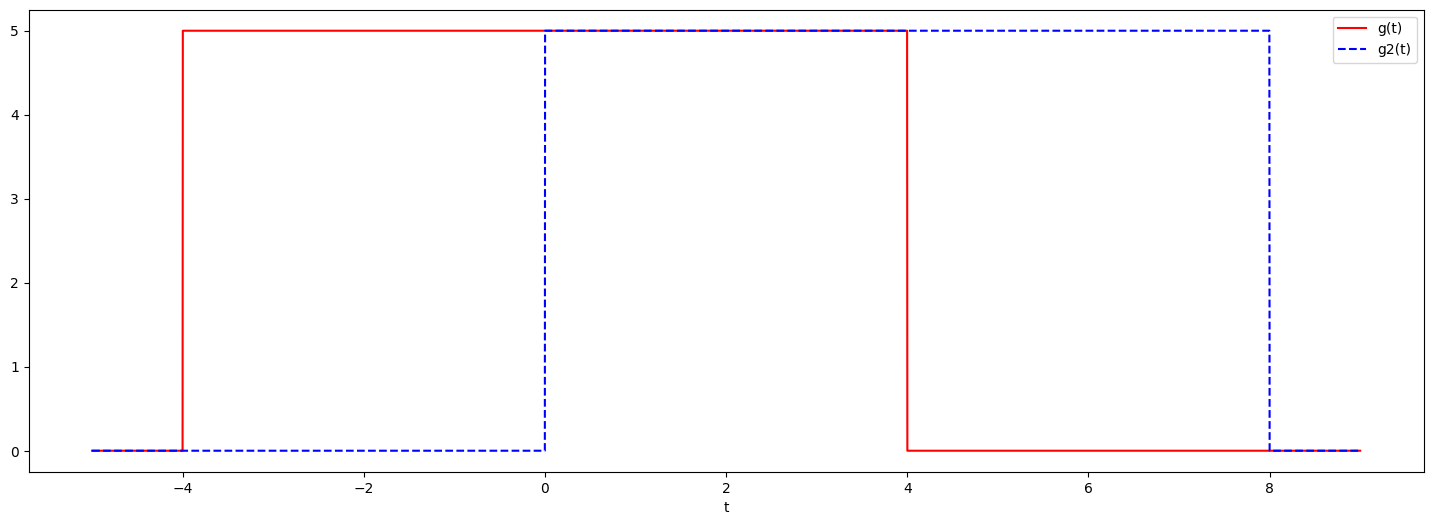

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gen_g(d, h):
    def g(t):
        return np.where((t >= -d / 2) & (t <= d / 2), h, 0)
    return g

D = 8
H = 5
SAMPLE_N = 5000

g = gen_g(D, H)

def CTFT(x, t, w):
    """
    x[i] and t[i] is the i-th sample of the signal and time,
    for each w[i], calculate the CTFT of x(t) at w[i]
    """
    Xw = np.zeros_like(w, dtype=complex)
    dt = t[1] - t[0]
    for i, wi in enumerate(w):
        # Two iterators here, x and t
        Xw[i] = np.sum(x * np.exp(-1j * wi * t) * dt)
    return Xw

def func_transform(ori_func, param_func, times):
    def output_func(t):
        return ori_func(param_func(t)) * times
    return output_func

g2 = func_transform(g, lambda t: t - D / 2, 1)

t_values = np.linspace(-5, 9, SAMPLE_N)
g_values = g(t_values)
g2_values = g2(t_values)
fig = plt.figure(figsize=(18, 6))
plt.plot(t_values, g_values, 'r-', label=f'g(t)')
plt.plot(t_values, g2_values, 'b--', label=f'g2(t)')
plt.xlabel('t')
plt.legend()
fig.show()

Gw Modulus
Gw Phase
Gw Real
Gw Imaginary


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_44797/2816087410.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


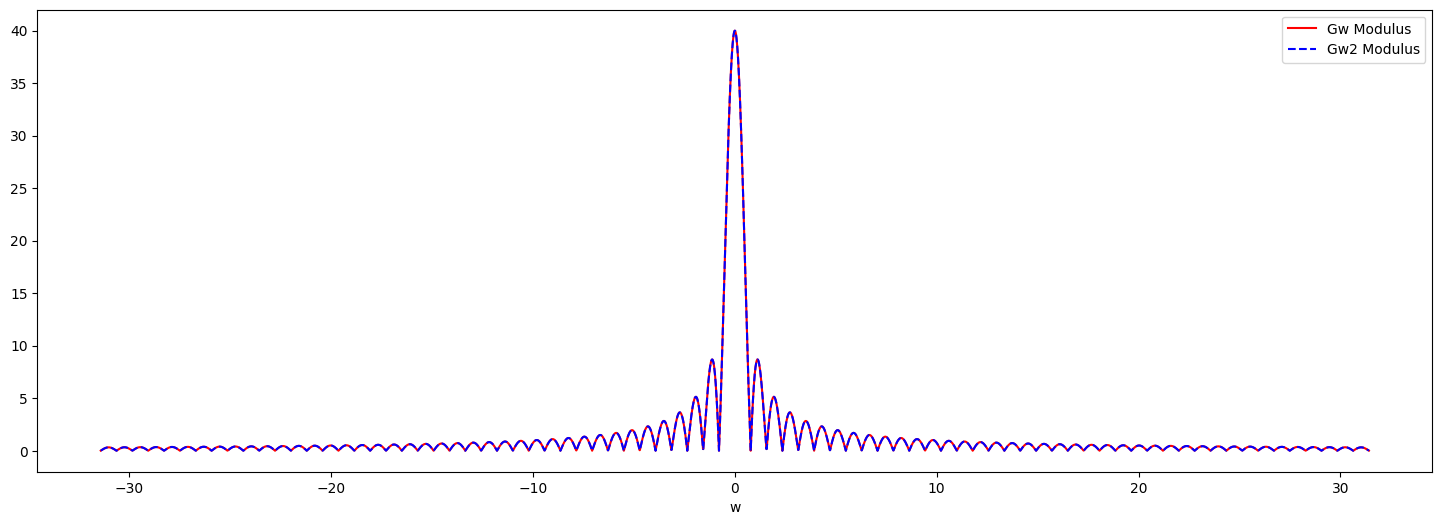

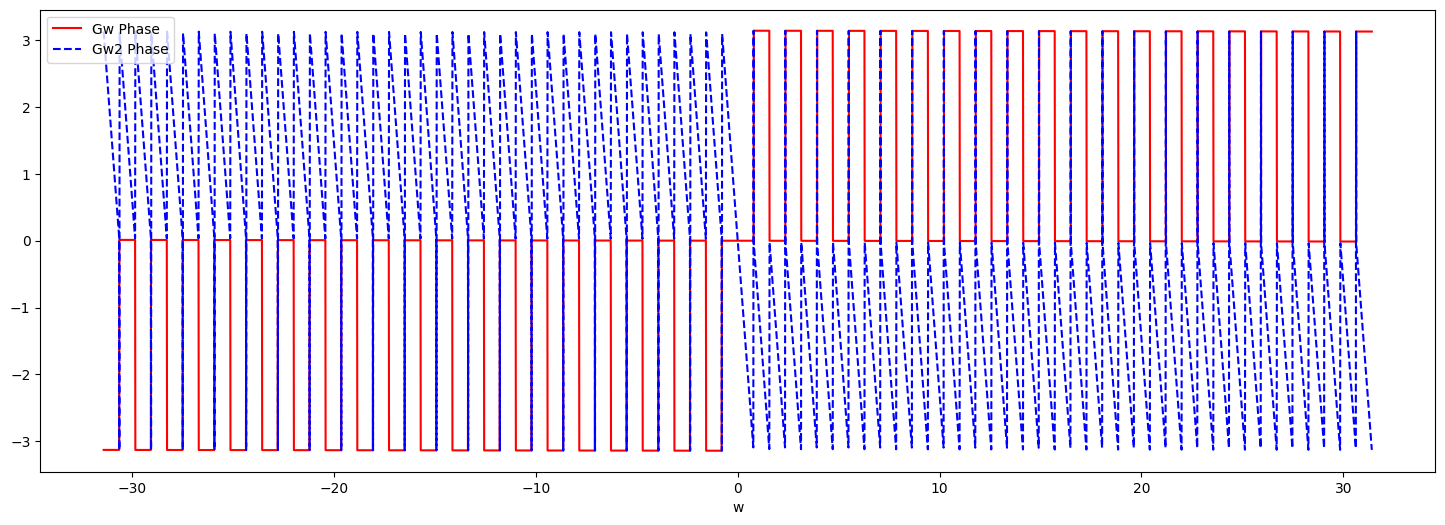

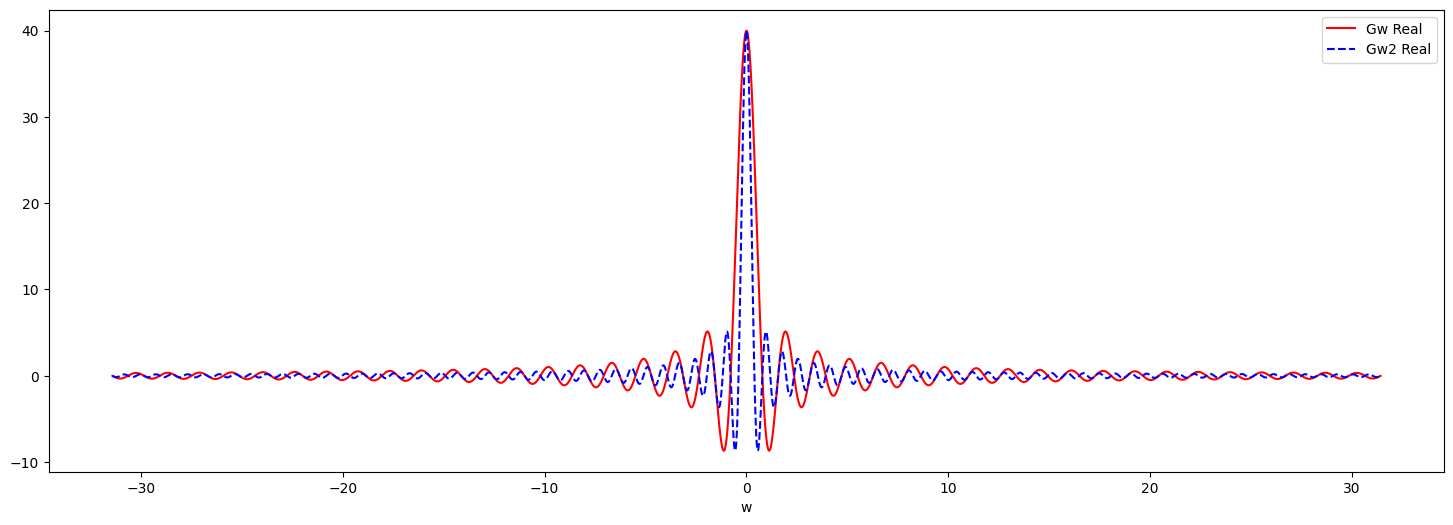

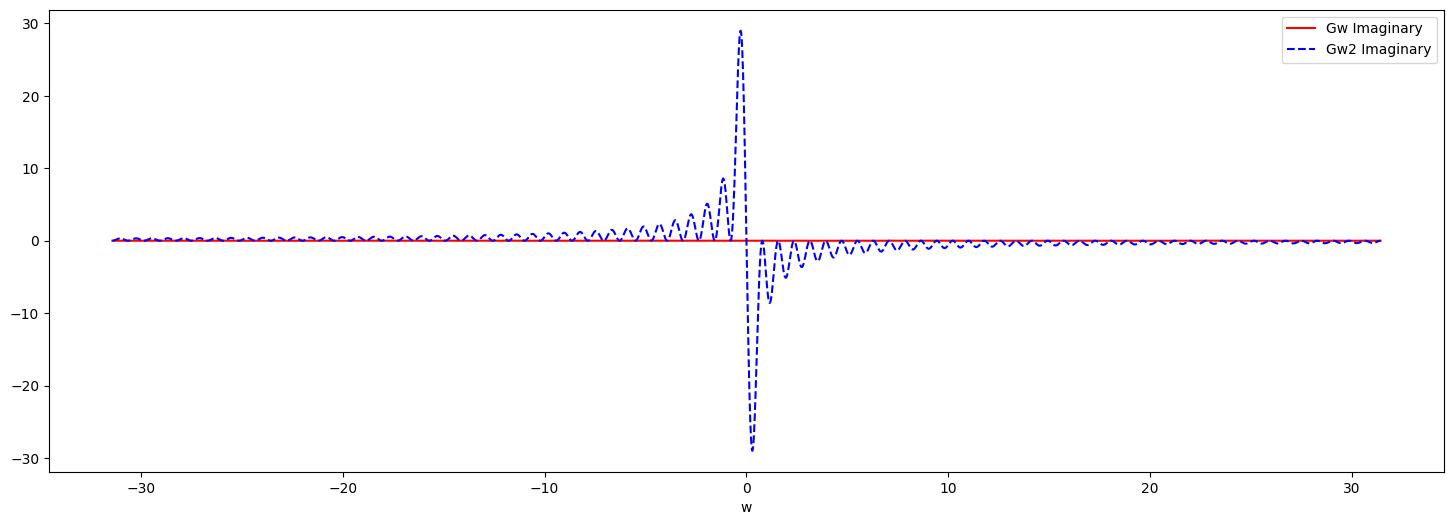

In [8]:
maxw = 10 * np.pi
w_values = np.linspace(-maxw, maxw, SAMPLE_N)
Gw = CTFT(g_values, t_values, w_values)
Gw2 = CTFT(g2_values, t_values, w_values)
def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag
g_4plots = get_mod_pha_real_imag(Gw)
g2_4plots = get_mod_pha_real_imag(Gw2)
names = ['Modulus', 'Phase', 'Real', 'Imaginary']
for i in range(4):
    print(f'Gw {names[i]}')
    fig = plt.figure(figsize=(18, 6))
    plt.plot(w_values, g_4plots[i], 'r-', label=f'Gw {names[i]}')
    plt.plot(w_values, g2_4plots[i], 'b--', label=f'Gw2 {names[i]}')
    plt.xlabel('w')
    plt.legend() # 图例...
    fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_44797/1349342892.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


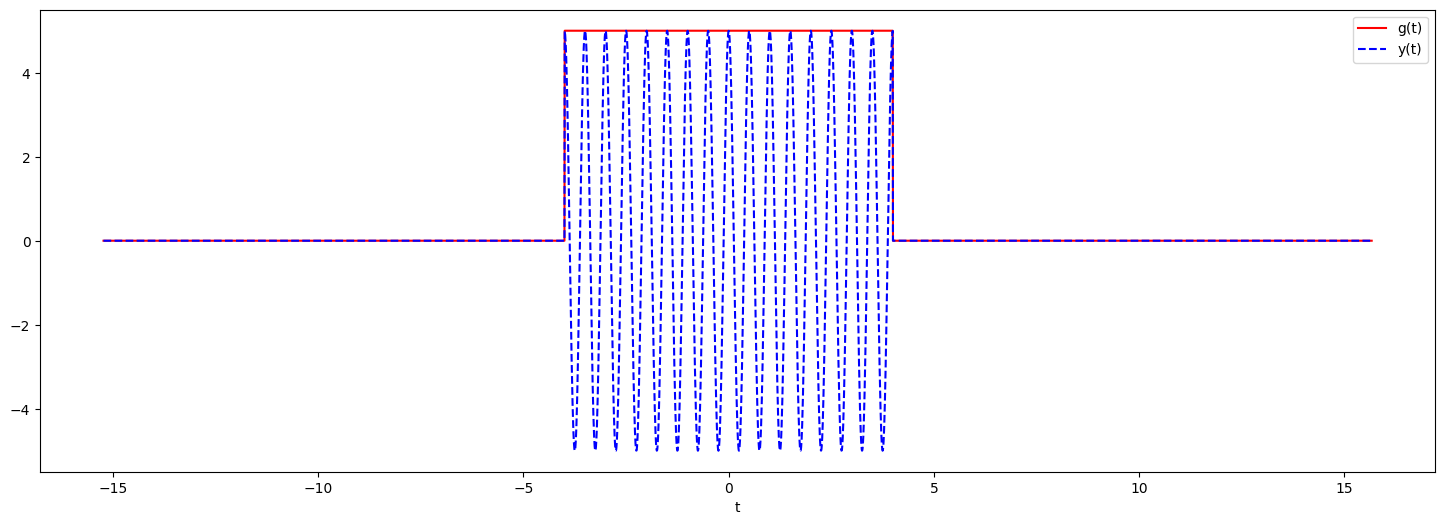

In [9]:
def y_func(t):
    return g(t) * np.cos(4 * np.pi * t)

t_values = np.linspace(-15.233, 15.666, SAMPLE_N)
y_values = y_func(t_values)
g_values = g(t_values)
fig = plt.figure(figsize=(18, 6))
plt.plot(t_values, g_values, 'r-', label=f'g(t)')
plt.plot(t_values, y_values, 'b--', label=f'y(t)')
plt.xlabel('t')
plt.legend() # 图例...
fig.show()

(5000,) (5000,)
(5000,) (5000,)


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_44797/2366416085.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


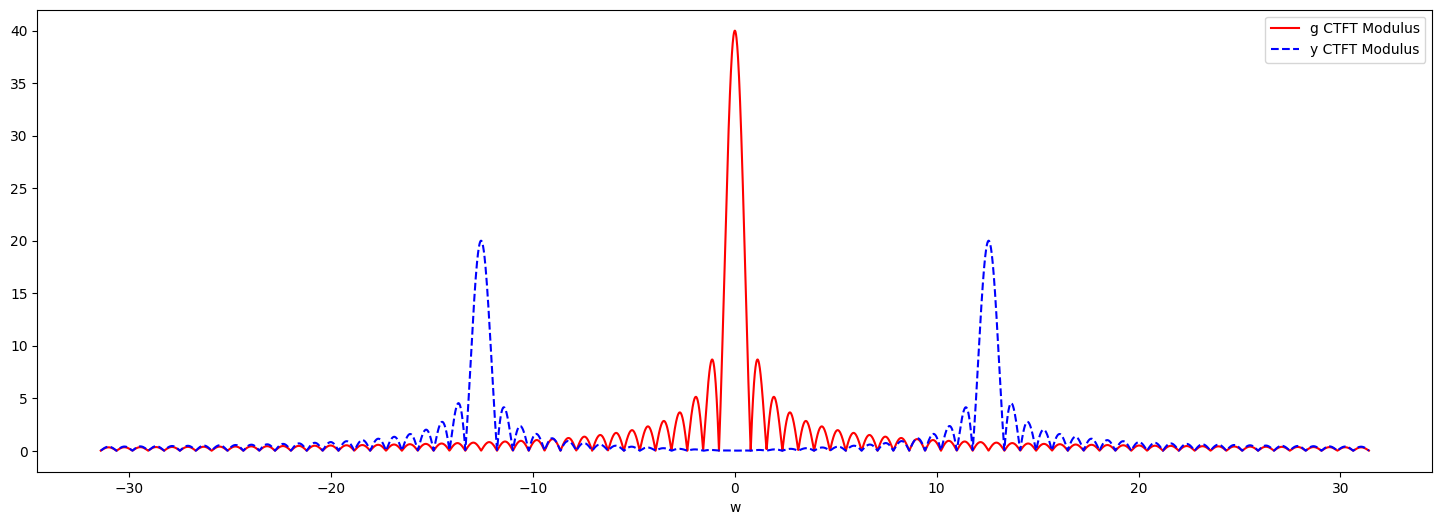

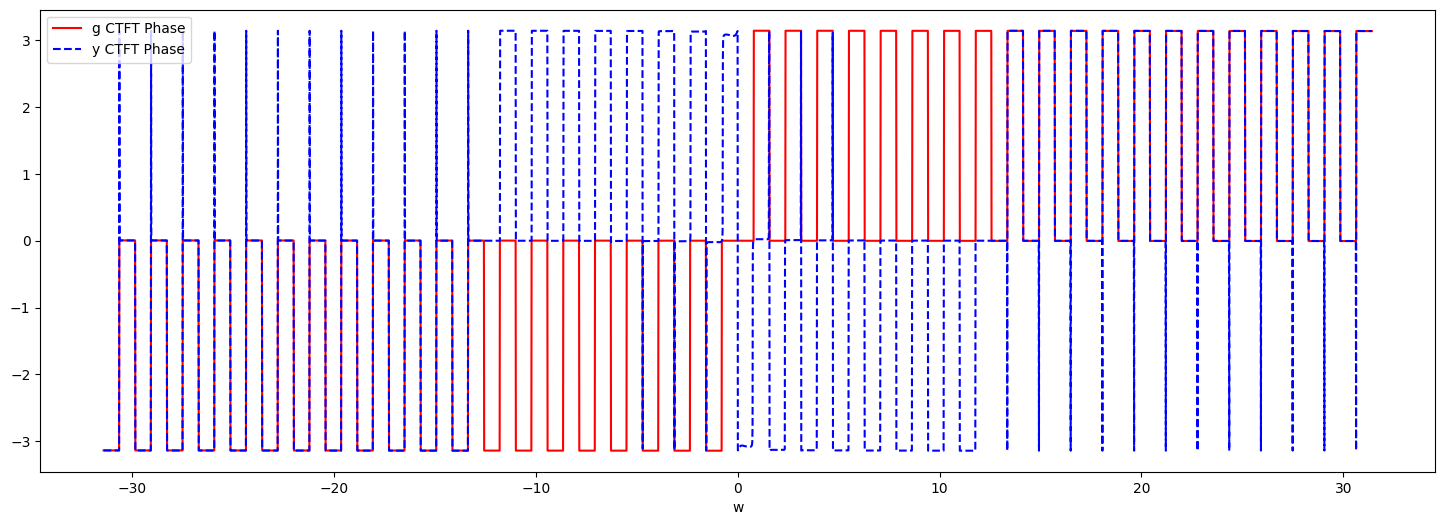

In [10]:
ctft_of_g = CTFT(g_values, t_values, w_values)
ctft_of_y = CTFT(y_values, t_values, w_values)
g_4plots = get_mod_pha_real_imag(ctft_of_g)
y_4plots = get_mod_pha_real_imag(ctft_of_y)

for prop in range(2):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(w_values, g_4plots[prop], 'r-', label=f'g CTFT {names[prop]}')
    print(w_values.shape, g_4plots[prop].shape)
    plt.plot(w_values, y_4plots[prop], 'b--', label=f'y CTFT {names[prop]}')
    plt.xlabel('w')
    plt.legend() # 图例...
    fig.show()

In [11]:
def calculate_energy(ys, xs):
    dx = xs[1] - xs[0]
    return sum(ys * ys.conjugate() * dx)

print(calculate_energy(y_values, t_values))
print(calculate_energy(ctft_of_y, w_values) / 2 / np.pi)

99.95650134599715
(99.38822453368164+0j)
